In [1]:
# General imports and namespace configuration
import random
from pprint import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy

from nn.activation_functions import *
from nn.cost_funtions import *
from nn.data_loader import load_data
from nn.misc import categorize, get_category
from nn import MultiLayeredPerceptron, NeuralNetwork

DATASETS_PATH = 'datasets/'

In [2]:
training_data, validation_data, test_data = load_data(DATASETS_PATH + 'mnist.pkl.gz')

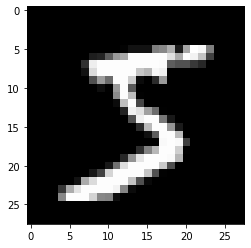

In [3]:
plt.imshow(numpy.reshape(training_data[0][0], (28, 28)), cmap='gray')
plt.show()

### Categorize the tags

In [4]:
def categorize_data(data):
    categorized_data = []
    for image_sample, tag in zip(data[0], data[1]):
        flat_image = numpy.reshape(image_sample, (784,1))
        category = categorize(tag)
        categorized_data.append((flat_image, category))
    return tuple(categorized_data)

In [5]:
training_data_categorized = categorize_data(training_data)
validation_data_categorized = categorize_data(validation_data)
test_data_categorized = categorize_data(test_data)

In [8]:
mlp = MultiLayeredPerceptron().create((784, 100, 10))

In [15]:
result = mlp.feedforward(training_data_categorized[0][0])
result, training_data_categorized[0][1]

(array([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]]))

### A continuous cost function

## The sigmoid function

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

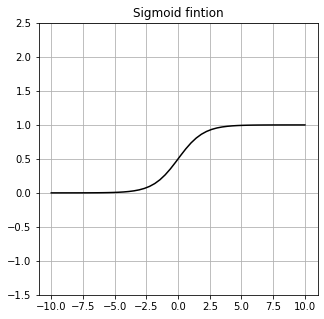

In [16]:
x = numpy.linspace(-10, 10)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(x, sigmoid(x), 'k')
# ax.set_xlim(-2, 2)
ax.set_ylim(-1.5, 2.5)
ax.grid()
# ax.set_aspect('equal')
ax.set_title("Sigmoid fintion")
plt.show()

In [17]:
mlp = MultiLayeredPerceptron().create((784, 100, 10), activation_function='sigmoid')
result = mlp.feedforward(training_data_categorized[0][0])
result, training_data_categorized[0][1]

(array([[0.99878455],
        [0.00570042],
        [0.00126384],
        [0.00407197],
        [0.99965276],
        [0.98292728],
        [0.99897743],
        [0.27159347],
        [0.00104864],
        [0.99997206]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [18]:
def square_error(tagged_dataset, evaluation_funtion):
    data_length = len(tagged_dataset)
    error = 0
    for sample, dataset_tag in tagged_dataset:
        predicted_tag = evaluation_funtion(sample)
        delta = dataset_tag - predicted_tag
        error += delta.T.dot(delta)
    return error / data_length

In [19]:
square_error(training_data_categorized, mlp.feedforward)

array([[5.13361655]])

### Gradient descent
![gradient descent](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)
Let $f(\vec{x})$ be a continuous function from $R^n \to R$

$$ \vec{x}_{i+1} = \vec{x}_{i} - \eta \cdot \nabla f(\vec{x}_{i}) $$
$$ \nabla f(\vec{x}) = \frac{\partial \vec{x}}{\partial x_i} $$

### Stochastic gradient descent
![stochastic gradient descent](https://blog.paperspace.com/content/images/2018/05/fastlr.png)

$$ \vec{x}_{i+1} \approx \vec{x}_{i} - \eta \cdot \nabla_{\approx} f(\vec{x}_{i}) $$


In [20]:
neural_network = NeuralNetwork().create((784, 128, 10), activation_function='sigmoid')

In [21]:
neural_network.feedforward(training_data_categorized[0][0])

array([[4.96951001e-01],
       [9.99956663e-01],
       [9.98363231e-01],
       [3.51007949e-05],
       [3.98429530e-06],
       [4.05501988e-01],
       [2.18515497e-02],
       [9.99974608e-01],
       [9.99982858e-01],
       [9.98415636e-01]])

In [ ]:
neural_network.train_model(training_data_categorized, 30, 25, 1.0, test_data=validation_data_categorized)

Epoch 0 : 55.13 accurate
Epoch 1 : 63.99 accurate
Epoch 2 : 65.15 accurate
Epoch 3 : 65.68 accurate
